<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Fernanda Urrea, ROL: 201551522-0 </H3>
<H3 align='center'> Matías Gómez, ROL: 201460501-3 </H3>

<hr style="height:2px;border:none"/>

## 3. *Taxi Trip Duration*: Predicción de duración de viaje

<img src="https://upload.wikimedia.org/wikipedia/commons/4/4d/Newyorkcity_taxi_motion_banner.jpg" />


En esta actividad trabajaremos con un dataset de una competencia en la plataforma Kaggle, el cual se llama **New York City Taxi Trip Duration** y que puede ser accedido a través del siguiente __[link](https://www.kaggle.com/c/nyc-taxi-trip-duration/)__. Como se puede ver es una competencia para predecir la duración del viaje de un taxi en Nueva York, por lo que es un problema de regresión que resulta altamente no lineal  y no determinista debido a las invariantes que tiene, por ejemplo un viaje de un punto a otro puede durar distinto tiempo dependiendo de múltiples factores, como el horario, la congestión de ese día u otros.

La métrica de evaluación de la competencia y la que utlizaremos será el RMSLE (*Root Mean Squared Logarithm Error*):

$$
E(y,\hat{y}) = \sqrt{ \frac{1}{n} \sum_{i=1}^n \left( \log{(y_i +1)}- \log{(\hat{y}_i+1}) \right)^2}
$$

O en código Python:

In [1]:
import numpy as np
def rmsle(predicted,real):    
    suma=0.0
    for x in range(len(predicted)):
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        suma += np.power((p - r),2)
    return np.sqrt(suma/len(predicted))

Descarge los datos de la competencia, únicamente trabajaremos con el archivo *train.zip* o *train.csv*, ya que no conocemos los valores reales del conjunto *test*, tendrémos que simularlo.

#### a) Cargue los datos de entrenamiento como *dataframes* de pandas. Describa las variables involucradas en el problema, explorando el tipo de datos de que se trata, el número de valores distinto. Grafique adecuadamente el valor a predecir con algún gráfico que resuma su comportamiento, e.g. un histograma, boxplot u otro.

In [2]:
import pandas as pd
df = pd.read_csv("train.csv")
df.info()
df.head()
output = df['trip_duration'].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [3]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


id – único número identificador del viaje  
vendor_id –  Es un código que indica el proovedor asociado a el viaje  
pickup_datetime – consiste en la fecha y hora cuando el taxímetro  
dropoff_datetime – fecha y hora cuando el taxímetro fue desactivado.  
passenger_count – número de pasajeros en el  vehiculo.  
pickup_longitude – Es la longitud donde el taxímetro fue activado.  
pickup_latitude – Es la latitud donde el taxímetro fue activado.  
dropoff_longitude – Es la longitud donde el taxímetro fue desactivado.  
dropoff_latitude - Es la latitud donde el taxímetro fue activado.  
store_and_fwd_flag –Indica si es que el tiempo de viaje fue guardado en la memoria del vehiculo antes de ser enviado porque el vehículo no tenía conexión al servidor. (YES/NO)  
trip_duration –Duración del viaje en segundos.  

In [4]:
print(df['store_and_fwd_flag'].value_counts())

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64


In [5]:
print(df['vendor_id'].value_counts())

2    780302
1    678342
Name: vendor_id, dtype: int64


Notamos que en store and fwd flag nos muestra la cantidad de datos que tienen algun tipo de retraso en el informe de el tiempo de llegada pues el vehiculo no tiene conexión, luego existen 8045 datos que presentan este tipo de retraso mientras que 1450599 no lo presentan.  
Por otro lado notamos que existen solo 2 tipos de empresas que realizan los viajes siendo la repartición bastante pareja (780302 vs 678342)

In [6]:
df.boxplot(column='trip_duration')

Notamos que los datos se concentran en el primer intervalo entre 0 y 500000 segundos y una cantidad muy pequeña de datos se sale de este rango.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2C207DDD8>]],
      dtype=object)

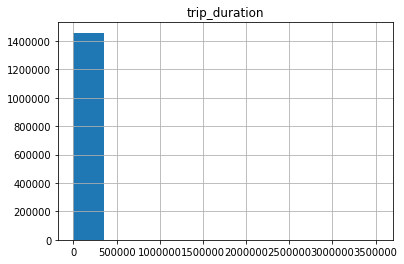

In [7]:
df.hist(column='trip_duration')

En el histograma se aprecia en cantidad como la mayoría de los datos que se encuentran en el intervalo ente 0 y 500000 segundos mientras que los demas datos aislados no tienen suficiente importancia en tal escala.

#### b) Como puede  observar en los análisis preliminares exiten algunos *outliers* en los datos los cuales pensamos eliminar para que no entorpezca el aprendizaje, además que son muy pocos.

In [8]:
#eliminar outliers
df = df[(df['trip_duration']<=100000)]

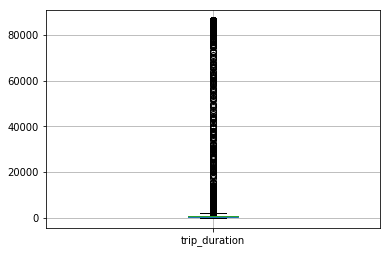

In [9]:
df.boxplot(column='trip_duration')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E2C28F4DD8>]],
      dtype=object)

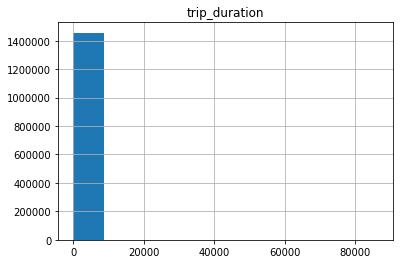

In [10]:
df.hist(column='trip_duration')

Ahora se puede apreciar como se eliminaron los datos aislados en relación al gráfico boxplot anterior.

#### c) La primera operación que realizaremos a los datos como pre-procesamiento será la de extraer/generar características de manera manual de algunos atributos que resulta necesario hacer, como desde la fecha (string) puede ser extraída la hora del día, creando una nueva columna denominada *hour* y de tipo *int* discreto, o bien, para la localización del viaje punto a punto se pueden extraer distintas **medidas de distancia**. Comente sobre el pre-procesamiento realizado.  

In [11]:
from geopy.distance import great_circle
import numpy as np

"""extraer caract geograficas"""
def distance(p_lat,p_long,d_lat,d_long):
    pickup = (p_lat, p_long)
    dropoff = (d_lat, d_long)
    distance_all=great_circle(pickup, dropoff).km
    return distance_all

def grado(p_lat,p_long,d_lat,d_long):
    lat1= np.radians(p_lat)
    lat2= np.radians(d_lat)
    dLon = np.radians(d_long - p_long)
    y = np.sin(dLon)*np.cos(lat2)
    x = np.cos(lat1)*np.sin(lat2) - np.sin(lat1)*np.cos(lat2)*np.cos(dLon)
    return (np.degrees( np.arctan2(y,x) ) + 360 ) %360

from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2015',end='2017')

def preprocesar(df):
    df.fillna(0,inplace=True)
    """transformar fechas a tiempos"""
    df['hour'] = pd.to_datetime(df['pickup_datetime']).dt.hour
    df['hour'] = pd.to_numeric(df['hour'])
    df['cday'] = pd.to_datetime(df['pickup_datetime']).dt.dayofweek #0:lunes,6:domingo
    df['cday'] = pd.to_numeric(df['cday'])
    df['month'] = pd.to_datetime(df['pickup_datetime']).dt.month #1:enero, 12: diciembre
    df['month'] = pd.to_numeric(df['month'])
    """Feature Generation"""
    df['distancia_viaje'] = np.sqrt( np.square(df['pickup_longitude']-df['dropoff_longitude']) 
                                    + np.square(df['pickup_latitude']-df['dropoff_latitude'])) #euclideana
    distancia_real_aprox = [ distance(df['pickup_latitude'].values[i], 
                                 df['pickup_longitude'].values[i],
                                 df['dropoff_latitude'].values[i],
                                 df['dropoff_longitude'].values[i]) for i in range(len(df['pickup_latitude']))]
    df['distancia_viaje_km'] = distancia_real_aprox
    df['grado_direccion'] = [ grado(df['pickup_latitude'].values[i],  #agregar direccion (en base a grado)
                                 df['pickup_longitude'].values[i],
                                 df['dropoff_latitude'].values[i],
                                 df['dropoff_longitude'].values[i]) for i in range(len(df['pickup_latitude']))]
    seasons = [0,0,1,1,1,2]  #0: winter, 1: spring, 2: summer
    df['season'] = [ seasons[df['month'].values[i] - 1] for i in range(len(df['month'])) ]  #agregar temporada
    df['holiday'] = df['pickup_datetime'].isin(holidays) #holidays
    """ Eliminar columnas -- limpiar"""
    df.drop(["pickup_datetime","dropoff_datetime","id","vendor_id","store_and_fwd_flag"], axis=1,inplace=True)
    df["holiday"] = df["holiday"].astype('category')#a categorico
    """codifica"""
    cat_columns = df.select_dtypes(['category']).columns
    df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)
preprocesar(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458640 entries, 0 to 1458643
Data columns (total 14 columns):
passenger_count       1458640 non-null int64
pickup_longitude      1458640 non-null float64
pickup_latitude       1458640 non-null float64
dropoff_longitude     1458640 non-null float64
dropoff_latitude      1458640 non-null float64
trip_duration         1458640 non-null int64
hour                  1458640 non-null int64
cday                  1458640 non-null int64
month                 1458640 non-null int64
distancia_viaje       1458640 non-null float64
distancia_viaje_km    1458640 non-null float64
grado_direccion       1458640 non-null float64
season                1458640 non-null int64
holiday               1458640 non-null int8
dtypes: float64(7), int64(6), int8(1)
memory usage: 157.2 MB


In [13]:
df.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,hour,cday,month,distancia_viaje,distancia_viaje_km,grado_direccion,season,holiday
0,1,-73.982155,40.767937,-73.964630,40.765602,455,17,0,3,0.017680,1.498523,99.970196,1,0
1,1,-73.980415,40.738564,-73.999481,40.731152,663,0,6,6,0.020456,1.805510,242.846232,2,0
2,1,-73.979027,40.763939,-74.005333,40.710087,2124,11,1,1,0.059934,6.385108,200.319835,0,0
3,1,-74.010040,40.719971,-74.012268,40.706718,429,19,2,4,0.013438,1.485501,187.262300,1,0
4,1,-73.973053,40.793209,-73.972923,40.782520,435,13,5,3,0.010690,1.188590,179.473585,1,0


En relación al preprocesamiento:  

Se elimino Id y vendor_id pues no aporta información para el problema.  

Se elimino store_and_fwd_flag pues con la información que entrega (yes/no) no era útil para la estimación.  

Se eliminaron las variables pickup_datetime y dropoff_datetime y en reemplazo se crearon varias columnas varias columnas especificando hora, día y mes.    

Se agregan las columnas distancia_viaje, distancia_viaje_km y grado_direccion calculadas a partir de las funciones definidas anteriormente, en relación a estas funciones:  


La función great_circle de geopy calcula la distancia geodésica a partir de las coordenadas, esto es, la línea de mínima longitud que une dos puntos de una superficie dada y esta contenida en esta superficie.  

Usa un modelo esferico de la tierra, usando el radio medio definido por la Union internacional de geodesia y geofisica, equivalente a 6371.009 km, resulta un error de a lo más 0,5%, El valor del radio esta guardado en distance.EARTH_RADIUS, lo que implica que puede ser cambiado si se desea otro mas preciso.  
 
La segunda función entrega el angulo en el plano.  

Se crea la variable holiday como variable categorica, sin embargo este valor es el mismo para todos los datos.  


In [14]:
print(df['holiday'].value_counts())

0    1458640
Name: holiday, dtype: int64


<div class="alert alert-info"> *Si el proceso demora mucho, lo que se aconseja es realizarlo una vez, guardar los datos en disco y luego leerlos cada vez que se experimenta con los códigos para las pruebas de los modelos de aprendizaje* </div>

#### d) Cree las estructuras de los datos a utilizar, además de crear el conjunto de pruebas para validar los modelos ¿Cuáles son las dimensiones de cada conjunto? Normalice los datos, elija algún *scaler* y comente sobre su decisión.

In [15]:
y = df['trip_duration'].values
df.drop("trip_duration",axis=1,inplace=True)
X = df.values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.preprocessing import RobustScaler,StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler = RobustScaler(with_centering=True, with_scaling=True)

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

La función $\textbf{StandardScaler}$, normaliza los datos, dejando media 0 y varianza 1. Esto se hace con el fin de que los astributos se asemejen a una distribución normal estandar y poder trabajar con ellos con una menor probabilidad de error, pues muchos estimadores y algoritmos necesitan que los datos de entrada se encuentren normalizados. Por otro lado, hay veces que la media de cada atributo no es un buen representante de la muestra total (Por ejemplo, cuando una pequeña cantidad de datos tiene valores muy altos, mientras que el resto se concentra en valores más bajos) En esos casos, otras medidas como la mediana y el rango intercuatílico ofrecen mejores resultados. La función $\textbf{RobustScaler}$, considera estas últimas medidas, escalando los datos acorde al rango intercuartílico, es decir, el rango entre el primer y tercer cuartil.

En lo que viene usaremos $\textbf{RobustScaler}$, porque en el dataset se encuentran muchos datos de viajes de corta duración y pocos de duración muy larga, entonces, deducimos que la media no sería tan buen estimador como los rangos entre cuartiles.  

In [17]:
X_train[2]

array([ 1.00000000e+00, -7.39506989e+01,  4.07794037e+01, -7.38631287e+01,
        4.07686081e+01,  1.30000000e+01,  6.00000000e+00,  4.00000000e+00,
        8.82331179e-02,  7.47109890e+00,  9.92174656e+01,  1.00000000e+00,
        0.00000000e+00])

passenger_count
pickup_longitude
pickup_latitude
dropoff_longitude
dropoff_latitude
hour
cday
month
distancia_viaje
distancia_viaje_km
grado_direccion
season
holiday


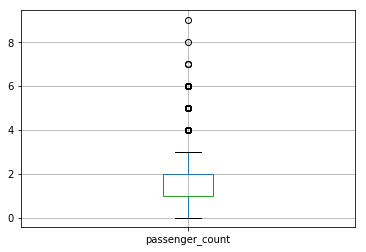

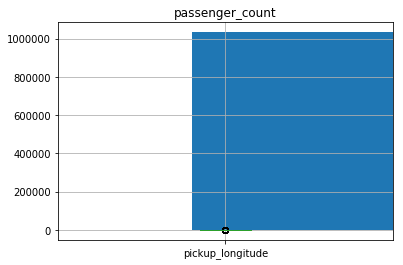

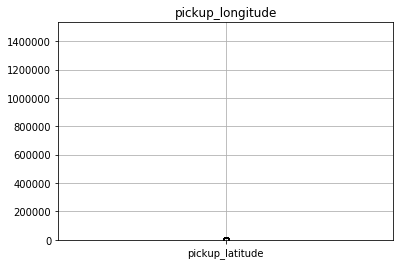

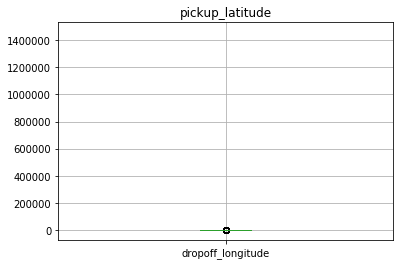

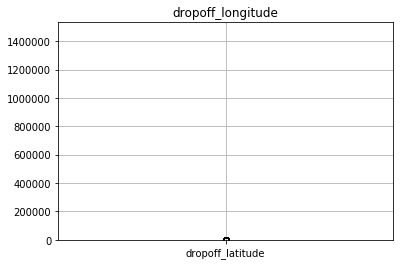

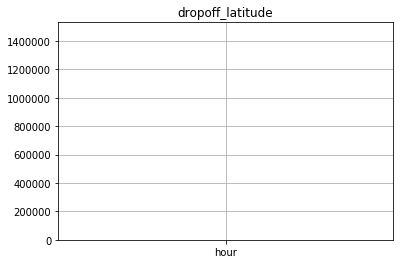

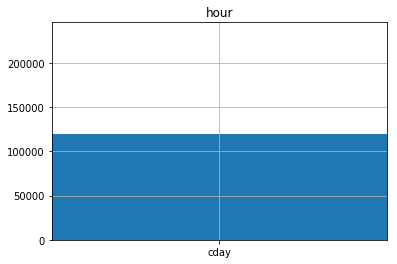

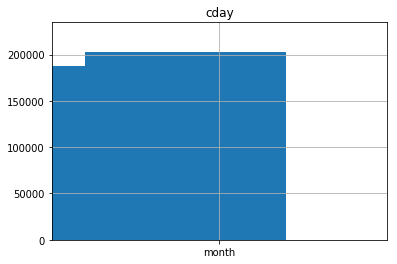

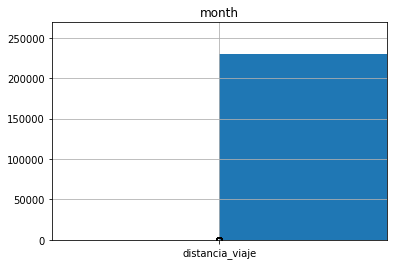

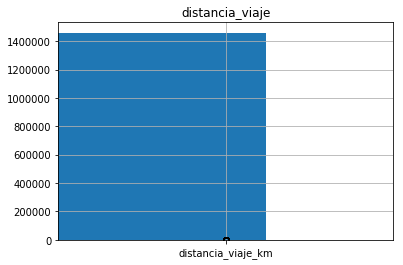

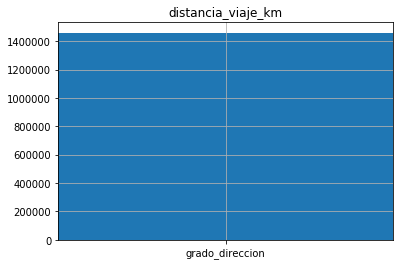

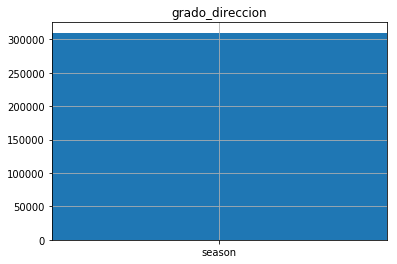

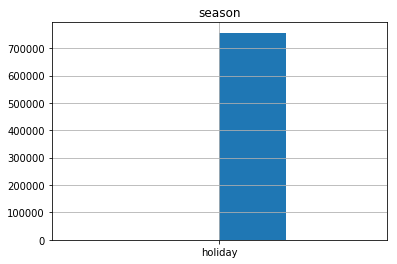

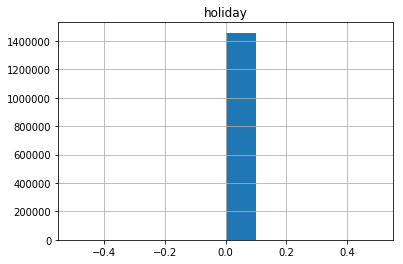

In [18]:
for columnas in df.columns:
    print(columnas)
    df.boxplot(column=str(columnas))
    df.hist(column=str(columnas))

In [19]:
X_train_scaled.shape

(1021048, 13)

In [20]:
X_test_scaled.shape

(437592, 13)

In [21]:
X_train_scaled[0]

array([ 0.        , -0.01555694,  0.78895075, -0.26443605,  0.63649635,
        0.2       , -0.75      , -1.        , -0.6012209 , -0.59859099,
        0.38510372, -1.        ,  0.        ])

El conjunto de entrenamiento cosnta de 1.021.050 ejemplos de 13 atributos cada uno; y el conjunto de prueba consta de 437.594 ejemplos con 13 atributos cada uno.  

#### e) En base a la definición del problema de ésta sección y a lo experimentado en la sección 1, escoga un modelo de aprendizaje para experimentar en la predicción de la duración del viaje, comente sobre su decisión. Entrene el modelo escogido, usando parámetros por defecto, sobre la representación escalada generada anteriormente y mida el error de la competencia RMSLE sobre ambos conjuntos, comente.

In [22]:
import time
start_time =time.time()
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train_scaled,y_train)
print("ERROR RMSLE de training: ", rmsle(model.predict(X_train_scaled),y_train))
print("ERROR RMSLE de test: ", rmsle(model.predict(X_test_scaled),y_test))
print("--- %s seconds ---" % (time.time() - start_time))

ERROR RMSLE de training:  0.0038295678389364796
ERROR RMSLE de test:  0.5802861499364973
--- 55.6599760055542 seconds ---


COMENTARIO:  
De lo anterior, notamos a partir del error de entrenamiento y del error de test que hay un notable sobreajuste en el modelo, lo cual tiene mucho sentido debido a la gran cantidad de distintas duraciones de los viajes que existen en el dataset y lo sensible que son los arboles de decisión a este tipos de caracteristicas. Por otro lado si no se especifica el parametro max_depth entonces por default el modelo extenderá sus ramas hasta llegar a hojas puras.  

#### f) Grafique las predicciones generadas por su modelo *vs* el valor real ¿Cuál es el comportamiento esperado? ¿Su resultado se asemeja a éste? ¿Por qué?

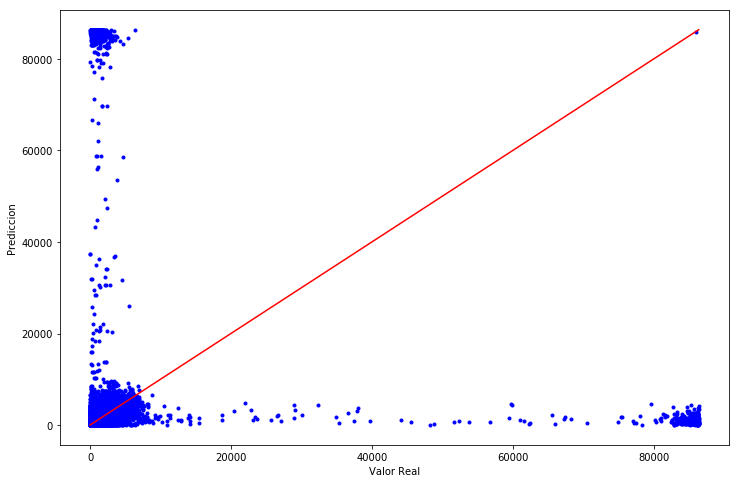

In [23]:
import matplotlib.pyplot as plt
def graficar_predicciones(real,predecido):
    plt.figure(figsize=(12,8))
    plt.plot(real,predecido,'b.')
    valor_max = int( np.max( [np.max(predecido),np.max(real)]))
    valor_min = int( np.min( [np.min(predecido),np.min(real)]))
    plt.plot(range(valor_min,valor_max+1), range(valor_min,valor_max+1), color ="r")
    plt.axis('tight')
    plt.xlabel('Valor Real')
    plt.ylabel('Prediccion')
    plt.show()
graficar_predicciones(y_test,model.predict(X_test_scaled))

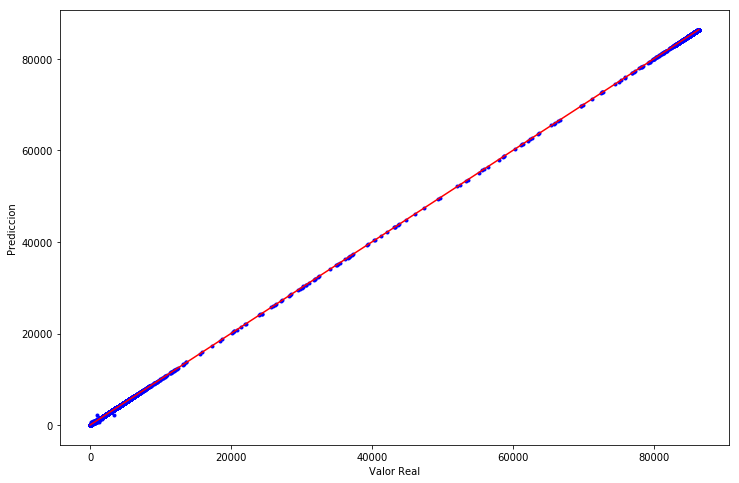

In [24]:
graficar_predicciones(y_train,model.predict(X_train_scaled))

Como en la parte anterior se obtuvo:  
ERROR RMSLE de training:  0.0038295678389364796  
ERROR RMSLE de test:  0.5803892226484098  

Se espera que la clasificación en el conjunto de entrenamiento sea muy buena y la del conjunto de pruebas sea muy mala.  

El comportamiento se parece totalmente al esperado luego de ver los resultados de las métricas de desempeño en el conjunto de entrenamiento y pruebas. En el gráfico del conjunto de pruebas, se ve que hay demasiados puntos mal clasificados, y los bien calsificados se concentran en ejemplos de duración pequeña. En el gráfico del conjunto de entrenamiento, en cambio, se observa una clasificación casi perfecta que refleja el overfitting del modelo.  

####  g) Mejore el desempeño del modelo de aprendizaje definido en e) haciendo modificaciones a los hiper-parámetros del modelo. Por ejemplo, tener ojo con el sobre-ajuste del modelo. Naturalmente, está absolutamente prohibido tomar este tipo de decisiones en función del resultado de pruebas. Debe realizar estas elecciones evaluando sobre el conjunto de validación. Si no desea utilizarlo, y prefiere implementar validación cruzada u otra técnica automática, tiene la ventaja de poder usar el conjunto de validación como parte del entrenamiento. 

Primero crearemos un conjunto de validación a partir del conjunto de prueba.

In [25]:
#Conjunto de validación: 437.594 
X_val=X_test[:87594]
y_val=y_test[:87594]
#Nuevo conjunto de pruebas:
X_test_new=X_test[:350000]
y_test_new=y_test[:350000]

Reescalamos los datos a partir del conjunto de entrenamiento nuevo.  

In [26]:
scaler.fit(X_train)
X_train_new_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_new_scaled = scaler.transform(X_test_new)

Naturalmente, debemos reentrenar el modelo sin considerar el conjunto de validación.  

In [27]:
import time
start_time =time.time()
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train_new_scaled,y_train)
print("ERROR RMSLE de training: ", rmsle(model.predict(X_train_new_scaled),y_train))
print("ERROR RMSLE de validation: ", rmsle(model.predict(X_val_scaled),y_val))
print("ERROR RMSLE de test: ", rmsle(model.predict(X_test_new_scaled),y_test_new))
print("--- %s seconds ---" % (time.time() - start_time))

ERROR RMSLE de training:  0.0038295678389364796
ERROR RMSLE de validation:  0.5816551307773117
ERROR RMSLE de test:  0.5809205527459913
--- 76.44514179229736 seconds ---


A continuación graficamos el desempeño en los tres conjuntos:

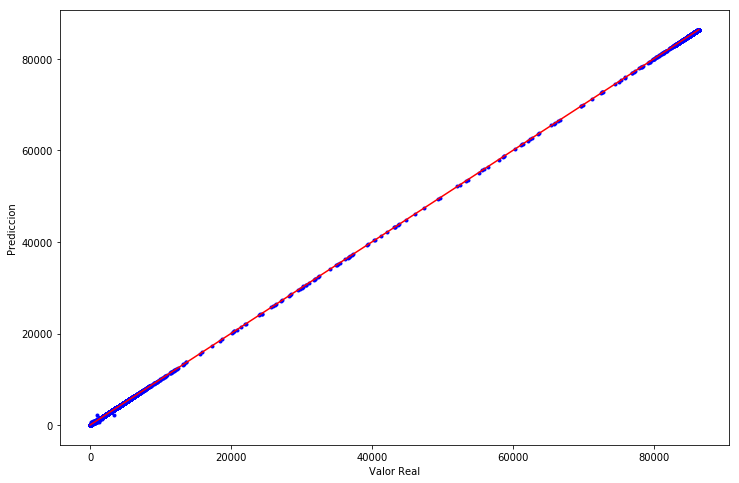

In [28]:
graficar_predicciones(y_train,model.predict(X_train_new_scaled))

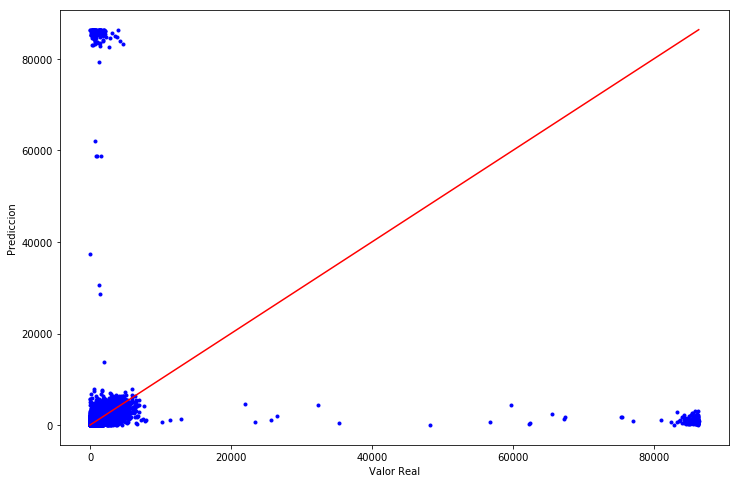

In [29]:
graficar_predicciones(y_val,model.predict(X_val_scaled))

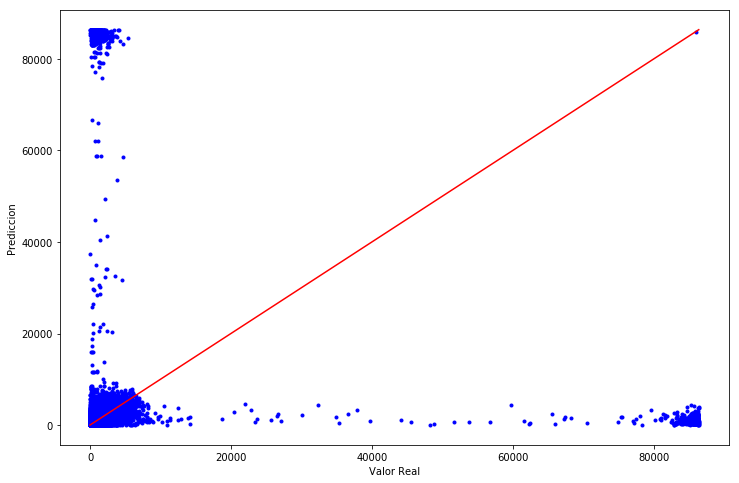

In [30]:
graficar_predicciones(y_test_new,model.predict(X_test_new_scaled))

Procederemos a entrenar nuevamente el modelo variando la profundidad con el fin de mejorar el error en el conjunto de validación.  

In [31]:
import time
start_time =time.time()
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.set_params(max_depth=10,splitter='best')
model.fit(X_train_new_scaled,y_train)
print("ERROR RMSLE de training: ", rmsle(model.predict(X_train_new_scaled),y_train))
print("ERROR RMSLE de validation: ", rmsle(model.predict(X_val_scaled),y_val))
#print("ERROR RMSLE de test: ", rmsle(model.predict(X_test_new_scaled),y_test_new))
print("--- %s seconds ---" % (time.time() - start_time))

ERROR RMSLE de training:  0.5527133838092855
ERROR RMSLE de validation:  0.5672272584468249
--- 36.353392124176025 seconds ---


In [32]:
import time
start_time =time.time()
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.set_params(max_depth=15,splitter='best')
model.fit(X_train_new_scaled,y_train)
print("ERROR RMSLE de training: ", rmsle(model.predict(X_train_new_scaled),y_train))
print("ERROR RMSLE de validation: ", rmsle(model.predict(X_val_scaled),y_val))
#print("ERROR RMSLE de test: ", rmsle(model.predict(X_test_new_scaled),y_test_new))
print("--- %s seconds ---" % (time.time() - start_time))

ERROR RMSLE de training:  0.5073533397378126
ERROR RMSLE de validation:  0.5515157648786918
--- 38.9978985786438 seconds ---


In [33]:
import time
start_time =time.time()
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.set_params(max_depth=20,splitter='best')
model.fit(X_train_new_scaled,y_train)
print("ERROR RMSLE de training: ", rmsle(model.predict(X_train_new_scaled),y_train))
print("ERROR RMSLE de validation: ", rmsle(model.predict(X_val_scaled),y_val))
#print("ERROR RMSLE de test: ", rmsle(model.predict(X_test_new_scaled),y_test_new))
print("--- %s seconds ---" % (time.time() - start_time))

ERROR RMSLE de training:  0.41902135244648986
ERROR RMSLE de validation:  0.525695453415011
--- 41.80121421813965 seconds ---


In [34]:
import time
start_time =time.time()
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.set_params(max_depth=10,splitter='best',min_samples_leaf=100)
model.fit(X_train_new_scaled,y_train)
print("ERROR RMSLE de training: ", rmsle(model.predict(X_train_new_scaled),y_train))
print("ERROR RMSLE de validation: ", rmsle(model.predict(X_val_scaled),y_val))
#print("ERROR RMSLE de test: ", rmsle(model.predict(X_test_new_scaled),y_test_new))
print("--- %s seconds ---" % (time.time() - start_time))

ERROR RMSLE de training:  0.5615247837185268
ERROR RMSLE de validation:  0.5769748381948119
--- 27.4864718914032 seconds ---


In [35]:
import time
start_time =time.time()
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.set_params(max_depth=30,splitter='best',min_samples_leaf=100)
model.fit(X_train_new_scaled,y_train)
print("ERROR RMSLE de training: ", rmsle(model.predict(X_train_new_scaled),y_train))
print("ERROR RMSLE de validation: ", rmsle(model.predict(X_val_scaled),y_val))
#print("ERROR RMSLE de test: ", rmsle(model.predict(X_test_new_scaled),y_test_new))
print("--- %s seconds ---" % (time.time() - start_time))

ERROR RMSLE de training:  0.5477960215519136
ERROR RMSLE de validation:  0.5800936071202316
--- 37.80422806739807 seconds ---


In [36]:
import time
start_time =time.time()
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.set_params(max_depth=30,splitter='best',min_samples_leaf=50)
model.fit(X_train_new_scaled,y_train)
print("ERROR RMSLE de training: ", rmsle(model.predict(X_train_new_scaled),y_train))
print("ERROR RMSLE de validation: ", rmsle(model.predict(X_val_scaled),y_val))
#print("ERROR RMSLE de test: ", rmsle(model.predict(X_test_new_scaled),y_test_new))
print("--- %s seconds ---" % (time.time() - start_time))

ERROR RMSLE de training:  0.5311063255581685
ERROR RMSLE de validation:  0.577399414677649
--- 38.652541399002075 seconds ---


In [37]:
import time
start_time =time.time()
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.set_params(max_depth=30,splitter='random')
model.fit(X_train_new_scaled,y_train)
print("ERROR RMSLE de training: ", rmsle(model.predict(X_train_new_scaled),y_train))
print("ERROR RMSLE de validation: ", rmsle(model.predict(X_val_scaled),y_val))
#print("ERROR RMSLE de test: ", rmsle(model.predict(X_test_new_scaled),y_test_new))
print("--- %s seconds ---" % (time.time() - start_time))

ERROR RMSLE de training:  0.14465872232749244
ERROR RMSLE de validation:  0.5978646190697502
--- 19.94618582725525 seconds ---


In [50]:
import time
start_time =time.time()
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.set_params(max_depth=20,splitter='best',min_samples_leaf=20)
model.fit(X_train_new_scaled,y_train)
print("ERROR RMSLE de training: ", rmsle(model.predict(X_train_new_scaled),y_train))
print("ERROR RMSLE de validation: ", rmsle(model.predict(X_val_scaled),y_val))
#print("ERROR RMSLE de test: ", rmsle(model.predict(X_test_new_scaled),y_test_new))
print("--- %s seconds ---" % (time.time() - start_time))

ERROR RMSLE de training:  0.5182306855662726
ERROR RMSLE de validation:  0.5678115883991374
--- 38.35076594352722 seconds ---


De la experimentación sucesiva deducimos que el mejor modelo es el siguiente:

In [51]:
import time
start_time =time.time()
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.set_params(max_depth=20,splitter='best')
model.fit(X_train_new_scaled,y_train)
print("ERROR RMSLE de training: ", rmsle(model.predict(X_train_new_scaled),y_train))
print("ERROR RMSLE de validation: ", rmsle(model.predict(X_val_scaled),y_val))
#print("ERROR RMSLE de test: ", rmsle(model.predict(X_test_new_scaled),y_test_new))
print("--- %s seconds ---" % (time.time() - start_time))

ERROR RMSLE de training:  0.41902136176410065
ERROR RMSLE de validation:  0.5267800302722289
--- 41.359281063079834 seconds ---


Para ese modelo procedemos a graficar los conjuntos.

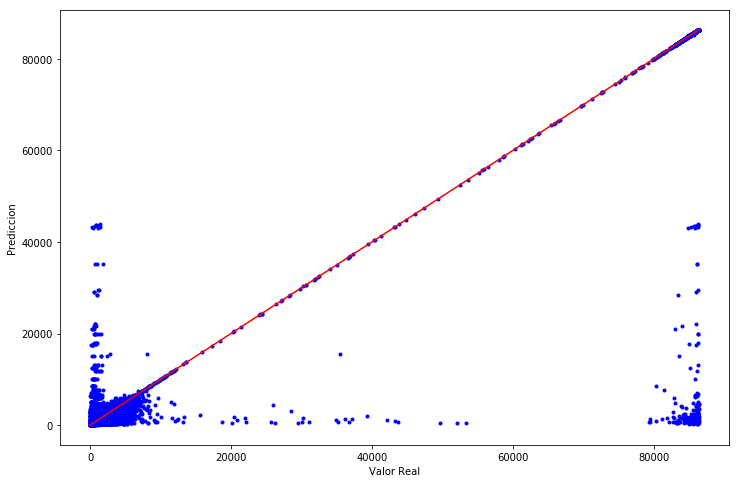

In [52]:
graficar_predicciones(y_train,model.predict(X_train_new_scaled))

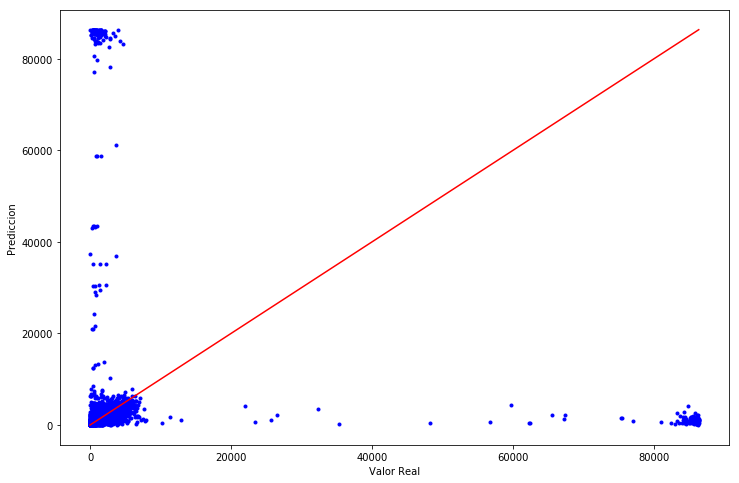

In [53]:
graficar_predicciones(y_val,model.predict(X_val_scaled))

#### h) Mejore el modelo de aprendizaje definido en el punto anterior, g), haciendo modificaciones sobre la representación utilizada para aprender desde los datos, es decir, *feature engineering* [[6]](#refs). Ya sea añadir nuevas características (puede inspirarse en los __[códigos](https://www.kaggle.com/c/nyc-taxi-trip-duration/kernels)__ de la gente en la competencia), como por ejemplo rescatar algo más de la fecha, como el año o los minutos, o algo de la ubicación y la distancia geográfica. También está la opción de utilizar lo visto en la tarea 1, de *feature selection* con FSS, *Mutual Information*, etc. Sea creativo, este paso le debiese reportar un salto de calidad muy significativo (RMSLE disminuir en 0.1 sobre el conjunto de pruebas).

Las ideas surgidas para la ingeniería de atributos son:  
  
Sacar una muestra de los datos de entrenamiento y medir como se relacionan las variables, para sacar conclusiones.  
Como el flujo en los fines de semana debiese variar mucho con respecto a la semana, crear una variable que detalle si es o no findesemana, esto ayudaría a la variable que señala el número del día.  
Graficar y mirar los flujos de transito en función de la hora y el día para quizas poder crear una variable que relaciones todas estas características.  

#### i) Ahora intente mejorar el modelo de aprendizaje definido en el punto anterior a través de alguna transformación al *output*. Por ejemplo, los histogramas que construyó en el punto a), ası́ como la forma especial de la función de evaluación, sugieren una cierta transformación de la variable respuesta (*output/target*). Una observación importante es que si hace una transformación a la variable respuesta (por ejemplo raı́z cuadrada), debe invertir esta transformación antes de evaluar el desempeño con la métrica de desempeño (por ejemplo, elevar al cuadrado si tomó raı́z cuadrada). Con ésto debería llegar a reducir el RMSLE a menos de 0.5.

Ahora teniendo en cuenta que podemos utilizar la duración de los viajes se tienen las siguientes ideas:  

Ver que viajes no tienen sentido, es decir, viajes cuya duración es más larga que lo que el conductor puede pasar despierto (un día quizas) o viajes tan cortos que duern un par de segundos (o menos de un minuto) en los que nisiquiera se alcanza a realizar el pago. por otro lado, se puede graficar la posicion inicia y final en funcion del tiempo y ver que viajes son imposibles de realizar.  

In [46]:
"""define your transformation!!"""
def transformar(valor):
    return valor #identidad
def destransformar(valor):
    return valor #identidad
model.fit(X_train_scaled,transformar(y_train))
print("ERROR RMSLE de training: ", rmsle(destransformar(model.predict(X_train_scaled)),y_train))
print("ERROR RMSLE de test: ", rmsle(destransformar(model.predict(X_test_scaled)),y_test))

ERROR RMSLE de training:  0.5527133838092855
ERROR RMSLE de test:  0.5622606534302843


#### j) Evalúe el efecto de utilizar un ensamblado (combinación) de 2 máquinas de aprendizaje para predecir la duración de un viaje en taxi. Un modelo se especializará en la predicción de la duración de viajes de corta distancia, mientras que el otro modelo se enfocará en la predicción de la duración de viajes de larga distancia. Para la separación considere la media aritmética como el *split*. Hay razones claras para pensar que los patrones son distintos ¿Por qué? Puede mezclar distintos modelos de aprendizaje para cada subconjunto de dato de entrenamiento.

Evidentemente, viendo los gráficos de las duraciones de los viajes, surge como idea separar los viajes largos de los cortos, pues estos se comportan de manera distinta. Así un ensamblaje de modelos que permota trabajar con ambos tipos de biajes se ve como una muy buena solución.

In [47]:
"""Separar viajes largos de viajes cortos"""
u = np.mean(X_train["distancia_viaje_km"])
mask = X_train["distancia_viaje_km"] <= u
X_train_1 = X_train[mask] #viaje cortos
y_train_1 = y_train[mask]
X_train_2 = X_train[~mask] #viaje largos
y_train_2 = y_train[~mask]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

<a id="refs"></a>
## Referencias
[1] Keras: Deep Learning library for Theano and TensorFlow. https://keras.io/  
[2] http://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html  
[3] https://en.wikipedia.org/wiki/Kernel_method  
[4] http://scikit-learn.org/stable/modules/multiclass.html  
[5] Tsoumakas, G., & Katakis, I. (2007). *Multi-label classification: An overview*. International Journal of Data Warehousing and Mining (IJDWM), 3(3), 1-13.  
[6] https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-6-feature-engineering-and-feature-selection-8b94f870706a  
[7] Bishop, C. M. (2006). *Pattern recognition and machine learning (information science and statistics)* springer-verlag new york. Inc. Secaucus, NJ, USA.